Training Linear Autoencoder...
Epoch [100/1000], Loss: 2417.2646
Epoch [200/1000], Loss: 2263.4556
Epoch [300/1000], Loss: 1938.6948
Epoch [400/1000], Loss: 1767.8685
Epoch [500/1000], Loss: 1692.0959
Epoch [600/1000], Loss: 1630.4027
Epoch [700/1000], Loss: 1566.0256
Epoch [800/1000], Loss: 1518.5890
Epoch [900/1000], Loss: 1489.8503
Epoch [1000/1000], Loss: 1473.8015

Saving Linear Autoencoder Reconstructions...


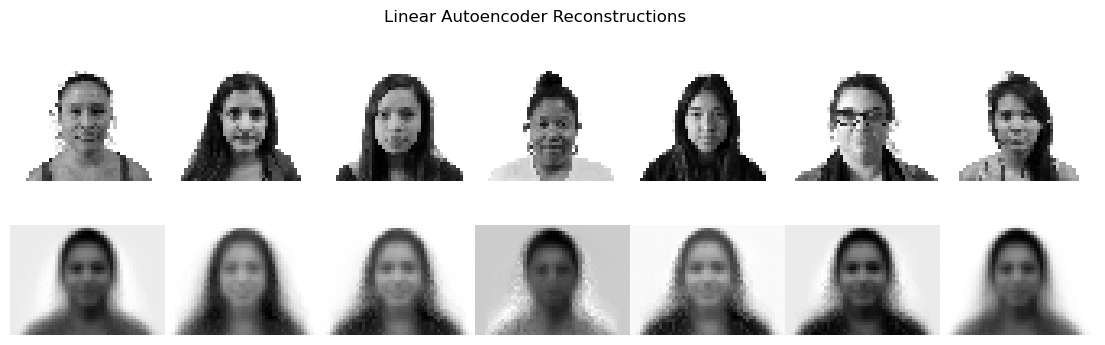


Saving Latent Space for Linear Autoencoder...


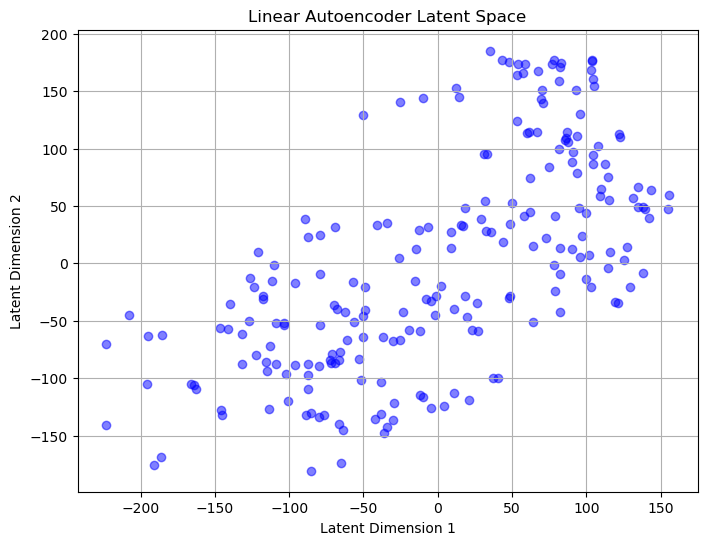

Training Non-linear Autoencoder...
Epoch [100/1000], Loss: 1329.0675
Epoch [200/1000], Loss: 1280.9364
Epoch [300/1000], Loss: 1224.5308
Epoch [400/1000], Loss: 1157.3248
Epoch [500/1000], Loss: 1114.2494
Epoch [600/1000], Loss: 1088.4452
Epoch [700/1000], Loss: 1075.4237
Epoch [800/1000], Loss: 1060.0712
Epoch [900/1000], Loss: 1047.1704
Epoch [1000/1000], Loss: 1041.1382

Saving Non-linear Autoencoder Reconstructions...


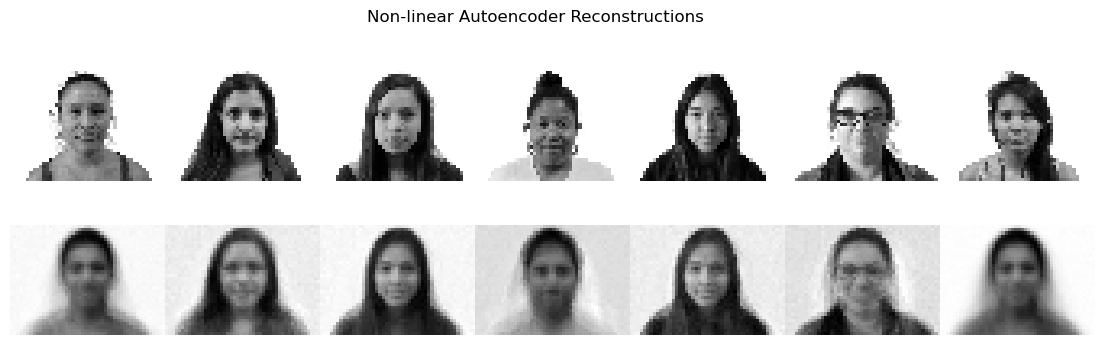


Saving Latent Space for Non-linear Autoencoder...


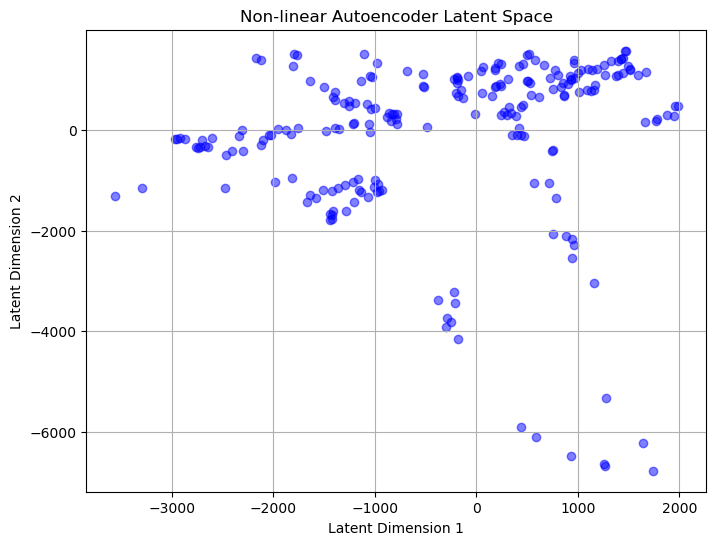

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


# Load data
X = np.load('X.npy')
xMean = np.mean(X, axis=0)
X = X - xMean
X = torch.tensor(X, dtype=torch.float32)

# Define the Linear Autoencoder
class LinearAutoencoder(nn.Module):
    def __init__(self):
        super(LinearAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(X.shape[1], 2),
            
        )
        self.decoder = nn.Sequential(   
            nn.Linear(2, X.shape[1])
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Define the Non-linear Autoencoder with ReLU
class NonLinearAutoencoder(nn.Module):
    def __init__(self):
        super(NonLinearAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(X.shape[1], 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 128),
            nn.ReLU(),
            nn.Linear(128, X.shape[1])
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Training function
def train_model(model, data, num_epochs=1000):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    for epoch in range(num_epochs):
        model.train()
        output = model(data)
        loss = criterion(output, data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    return model

# Plot latent space
def plot_latent_space(model, data, title, filename):
    model.eval()
    with torch.no_grad():
        encoded = model.encoder(data).numpy()

    plt.figure(figsize=(8, 6))
    plt.scatter(encoded[:, 0], encoded[:, 1], c='blue', alpha=0.5)
    plt.title(title)
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.grid(True)
    plt.show()
    plt.savefig(filename)
    plt.close()

# Save images
def save_images(model, data, xMean, title, filename):
    model.eval()
    with torch.no_grad():
        reconstructed = model(data).numpy()
        original = data.numpy()

    fig, axs = plt.subplots(2, 7, figsize=(14, 4))
    for i in range(7):
        ax = axs[0, i]
        ax.imshow((original[i] + xMean).reshape(34, 48), cmap='gray')
        ax.axis('off')

        ax = axs[1, i]
        ax.imshow((reconstructed[i] + xMean).reshape(34, 48), cmap='gray')
        ax.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(title)
    plt.show()
    plt.savefig(filename)
    plt.close()

# Instantiate and train both autoencoders
models = {
    'Linear Autoencoder': LinearAutoencoder(),
    'Non-linear Autoencoder': NonLinearAutoencoder()
}

for name, model in models.items():
    print(f"Training {name}...")
    trained_model = train_model(model, X)
    
    print(f"\nSaving {name} Reconstructions...")
    recon_filename = f'{name.lower().replace(" ", "_")}_reconstructions.png'
    save_images(trained_model, X, xMean, f'{name} Reconstructions', recon_filename)

    print(f"\nSaving Latent Space for {name}...")
    latent_filename = f'{name.lower().replace(" ", "_")}_latent_space.png'
    plot_latent_space(trained_model, X, f'{name} Latent Space', latent_filename)
